In [1]:
import cv2
from darkflow.net.build import TFNet

In [2]:
import matplotlib.pyplot as plt

# A magic function to display them as SVG instead of rasterized images
%config InlineBackend.figure_format = 'svg'

In [3]:
# Define options for running our model

options = {
    'model': "cfg/yolo.cfg",
    'load': 'bin/yolov2.weights',
    'threshold': 0.3,
    'gpu': 1.0
}

tfnet = TFNet(options)

/media/themlguy/New Volume/Workspace/ComputerVision/Projects/YoloV2/darkflow-master/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.06456518173217773s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [9]:
# Let us now use the "doge.jpg" image to predict

img = cv2.imread("doge.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)

result

[{'label': 'dog',
  'confidence': 0.58400273,
  'topleft': {'x': 170, 'y': 36},
  'bottomright': {'x': 502, 'y': 303}}]

In [10]:
# Lets now use these results to draw a box and display a label on the image

tleft = (result[0]['topleft']['x'], result[0]['topleft']['y'])

tleft

(170, 36)

In [11]:
bright = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])

bright

(502, 303)

In [12]:
label = result[0]['label']

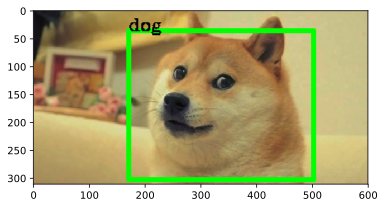

In [14]:
# Lets do some image processing to add a box on it

img = cv2.rectangle(img, tleft, bright, (0, 255, 0), 7)


img = cv2.putText(img, label, tleft, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()